https://github.com/sunyanici/AflowRestAPI

Taylor, R.H., et al., A RESTful API for exchanging materials data in the AFLOWLIB.org consortium. Computational Materials Science, 2014. 93: p. 178-192. https://doi.org/10.1016/j.commatsci.2014.05.014

https://www.makeuseof.com/what-is-rest-api/

ReST API: **Representational State Transfer Application Programing Interface**.

How does a ReST API work?

Accesses data through **URIs** (Uniform Resource Identifiers), a string of characters that identify specific resources.

URL (Uniform resource locator)


In [3]:
# manual
import json 
from urllib.request import urlopen 
SERVER='http://aflowlib.duke.edu/' # server name
PROJECT='AFLOWDATA/LIB3_RAW/' # project name
#URL=SERVER+’/’+PROJECT # project-layer
#URL=SERVER+’/’+PROJECT+’AlCu_pvMn_pv/’ # set-layer
URL=SERVER+PROJECT+'AlCu_pvMn_pv/T0001.A2BC/' # calculation-layer
entry=json.loads(urlopen(URL+'?format=json').read().decode()) # load
for key in entry: # loop keys
    print("{}={}".format (key, entry[key]))

aurl=aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AlCu_pvMn_pv/T0001.A2BC
auid=aflow:83cd2da0257e8def
data_api=aapi1.2
data_source=aflowlib
loop=bands,lock,magnetic,thermodynamics
code=vasp.4.6.35
compound=Al2Cu1Mn1
prototype=T0001.A2BC
nspecies=3
natoms=4
natoms_orig=4
composition=2,1,1
density=5.35995
density_orig=5.16285
scintillation_attenuation_length=2.29813
stoichiometry=0.5,0.25,0.25
species=Al,Cu,Mn
species_pp=Al,Cu_pv,Mn_pv
dft_type=PAW_PBE
species_pp_version=Al:PAW_PBE:04Jan2001,Cu_pv:PAW_PBE:06Sep2000,Mn_pv:PAW_PBE:07Sep2000
species_pp_ZVAL=3,17,13
species_pp_AUID=423324aa45d0242f,62263cf2c885649c,99be850476e2dfb3
valence_cell_iupac=17
valence_cell_std=24
volume_cell=53.425
volume_atom=13.3563
volume_cell_orig=55.4646
volume_atom_orig=13.8661
pressure=0
stress_tensor=-0.43,0,0,0,-0.43,0,0,0,-0.43
pressure_residual=-0.43
Pulay_stress=0
geometry=4.227529,4.227529,4.227529,60,60,60
geometry_orig=4.280656,4.280656,4.280656,60,60,60
energy_cell=-21.359
energy_atom=-5.33975
energy_cutoff

Example 1:

Generating a free-energy zero-temperature convex hull of OsTc

In [2]:
from urllib.request import urlopen
server = 'http://aflowlib.duke.edu/'
project = 'AFLOWDATA/LIB2_WEB/'
set = 'Os_pvTc_pv/'
url = server + project + set
entries = urlopen(url + '?aflowlib_entries')
jfile = entries.read().decode()

'1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,145,147,150,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,201,202,203,204,205,208,209,210,211,216,217,218,219,220,221,222,223,230,231,232,233,234,235,238,239,242,243,244,245,246,247,248,249,252,253,255,256,257,258,259,260,261,262,263,264,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,292,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,323,324,359,360,363,364,365,366,367,368,371,372,373,374,375,376,381,382,389,390,406,407,408,411,425,426,447,448,471,472,473,474,475,476,477,478,479,480,537,538,539,540,541,542,543,545,546,547,548,549,550,560,583,595,613,654.AB,654.BA,657.AB,657.BA,A7.A,A7.B,b1,b2,f1,f2,

In [3]:
j = jfile.split(',')
j[-1] = 'h3'

In [4]:
sto = []
ent = []
for key in j:
    urls = url + key + '/' + '?stoichiometry'
    stoich = urlopen(urls).read().decode()
    sto.append(stoich)
    urle = url + key + '/' + '?enthalpy_formation_atom'
    enthalpy = urlopen(urle).read().decode()
    ent.append(enthalpy)


In [59]:
stoich_data = []
for item in sto:
    item = item.strip()
    stoich_data.append(item)
enthalpy_data = []
for item in ent:
    item = item.strip()
    enthalpy_data.append(item)

In [60]:
enthalpy_data

['0.069361',
 '0.137242',
 '0.048854',
 '0.0698865',
 '0.0648713',
 '0.0844617',
 '0.0596583',
 '0.080841',
 '0.0773263',
 '0.093834',
 '0.0557685',
 '0.0886065',
 '0.066475',
 '0.083052',
 '0.0992525',
 '0.058202',
 '0.0665535',
 '0.091718',
 '0.0602235',
 '0.076873',
 '0.0922515',
 '0.0534643',
 '0.0614755',
 '0.083347',
 '0.0497662',
 '0.076542',
 '0.0742558',
 '0.096647',
 '0.106135',
 '0.261059',
 '0.885886',
 '0.529981',
 '0.54186',
 '0.0833617',
 '0.571392',
 '0.434043',
 '0.645023',
 '0.401894',
 '0.574544',
 '0.384543',
 '0.700863',
 '0.390094',
 '0.543022',
 '0.707173',
 '0.0603263',
 '-0.082656',
 '0.701327',
 '0.362279',
 '0.482333',
 '0.624926',
 '0.0530875',
 '0.539919',
 '0.0973245',
 '0.388369',
 '0.699736',
 '0.385699',
 '0.528735',
 '0.700805',
 '0.0003815',
 '-0.074295',
 '-0.00013',
 '-0.053222',
 '-0.0668465',
 '-0.0825585',
 '-0.0623638',
 '-0.056019',
 '-0.0804085',
 '-0.0619888',
 '-0.0348182',
 '-0.037801',
 '-0.0381858',
 '-0.0364417',
 '-0.0637112',
 '-0.0686

In [49]:
import csv
from itertools import zip_longest
stoich_data = [stoich_data]
enthalpy_data = [enthalpy_data]
export_data = zip_longest(*stoich_data, fillvalue='')
with open('sto.csv','w',newline='',encoding='ISO-8859-1') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(('Os','Tc'))
    wr.writerows(export_data)
myfile.close()
export_data2 = zip_longest(*enthalpy_data, fillvalue='')
with open('ent.csv','w',newline='') as myfile:
    wr = csv.writer(myfile)
    wr.writerow('e')
    wr.writerows(export_data2)
myfile.close()

In [54]:
import pandas as pd
df1 = pd.read_csv('sto.csv')
df2 = pd.read_csv('ent.csv')
df = pd.concat([df1.Os.str.split(',',expand=True),df2],axis=1)
col_names = ['Os','Tc','ent']
df.columns = col_names

In [56]:
df = df.drop(df[df.ent > 0.02].index)
df.to_csv('new.csv',index=None)

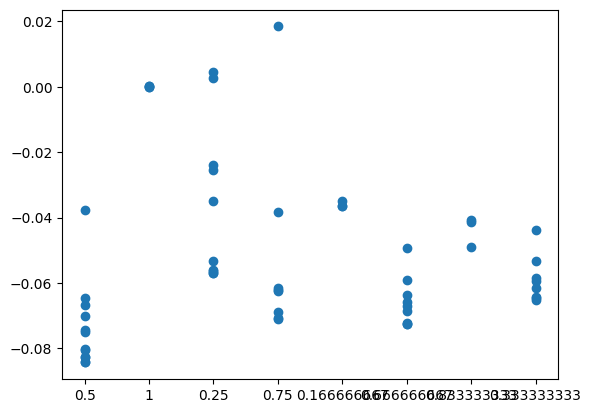

In [61]:
import matplotlib.pyplot as plt
plt.scatter(df.Os,df.ent)

Example 2:

Generating a zero temperature phase-diagram of CoNbSi

In [1]:
aurl3 = 'http://aflowlib.duke.edu/AFLOWDATA/LIB3_RAW/' # ternary systems
aurl2 = 'http://aflowlib.duke.edu/AFLOWDATA/LIB2_RAW/' # binary systems

CoNbSi = aurl3 + 'CoNb_svSi/'
CoNb = aurl2 + 'CoNb_sv/'
NbSi = aurl2 + 'Nb_svSi/'
CoSi = aurl2 + 'CoSi/'

stoich = '/?stoichiometry/'
enthalpy = '?/enthalpy_formation_atom'

comp = [CoNbSi, CoNb, NbSi, CoSi]

In [2]:
from urllib.request import urlopen
sto = [[] for _ in range(len(comp))]
ent = [[] for _ in range(len(comp))]
count = 0
for url in comp:
    entry = urlopen(url+'?aflowlib_entries')
    jfile = entry.read().decode()
    j = jfile.split(',')
    j[-1] = j[-1].replace('\n', '')

    for key in j:
        urls = url + key + '/' + '?stoichiometry'
        stoich= urlopen(urls).read().decode()
#     # print(stoich)
        sto[count].append(stoich)
        urle = url+ key + '/' + '?enthalpy_formation_atom'
        enthalpy = urlopen(urle).read().decode()
        ent[count].append(enthalpy)
    count += 1

#     # print(enthalpy)

In [3]:
sto3 = [[] for _ in range(len(sto))]
count = 0
for items in sto:
    for item in items:
        item = item.strip()
        sto3[count].append(item)
    count += 1

ent3 = [[] for _ in range(len(ent))]
count = 0
for items in ent:
    for item in items:
        item = item.strip()
        ent3[count].append(item)
    count += 1

In [8]:
import csv
from itertools import zip_longest

export_data = zip_longest(*sto3, fillvalue='')
with open('sto3.csv', 'w', newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(('CoNbSi','CoNb','NbSi','CoSi'))
      wr.writerows(export_data)
myfile.close()
export_data = zip_longest(*ent3, fillvalue='')
with open('ent3.csv', 'w', newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(('CoNbSi','CoNb','NbSi','CoSi'))
      wr.writerows(export_data)
myfile.close()

In [9]:
import pandas as pd
dfs = pd.read_csv('sto3.csv')
for i in dfs.columns:
    dfs = pd.concat([dfs, dfs[i].str.split(',', expand=True)], axis=1)
dfs = dfs.iloc[:, 4:]
dfs.columns = ['Co','Nb','Si','Co','Nb','Nb','Si','Co','Si']
dfs.to_csv('sto3.csv')



How to plot ternary Graph with Origin:

https://www.youtube.com/watch?v=fMWjoM9w9t4&ab_channel=StatgraphicsTechnologies%2CInc


https://www.originlab.com/fileExchange/details.aspx?fid=777